# Hackathon-2025 : Bee Dynamics in 3D (Lorenz Attractor)
------------------------------------------------------
### his script simulates the Lorenz system and plots the trajectory in 3D space. Think of this as a bee moving chaotically in 3D space. 

#  Lorenz Attractor - Bee Path in 3D

##  Task
We are asked to simulate a dynamical system defined by the Lorenz equations and visualize the bee’s path in 3D space.  
The equations are:

\[
\dot{x} = a(y-x), \quad 
\dot{y} = bx - y - xz, \quad 
\dot{z} = xy - cz
\]

with parameters:
- \(a = 10\)
- \(b = 28\)
- \(c = 2.667\)

and initial conditions:
\((x_0, y_0, z_0) = (0, 1, 1.05)\).

---

## XY, XZ, YZ Projections
To better understand the structure of the attractor, we project the trajectory onto 2D planes:

1. **XY Projection** → Motion pattern in the X-Y plane  
2. **XZ Projection** → Motion pattern in the X-Z plane  
3. **YZ Projection** → Motion pattern in the Y-Z plane  

These projections reveal hidden symmetries and structures of the chaotic system.


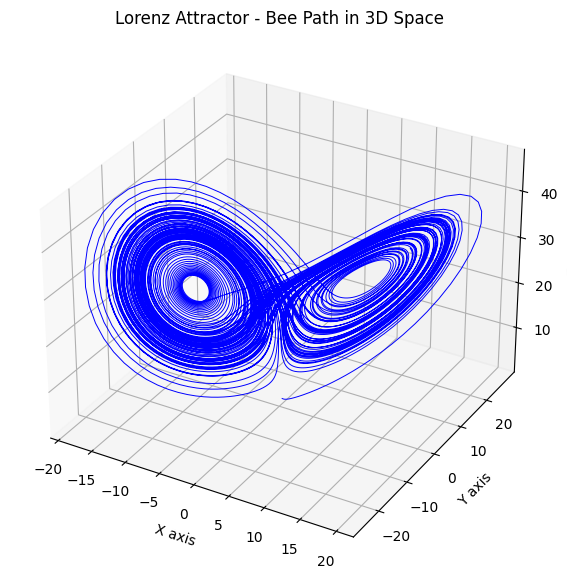

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class LorenzAttractor:
    """Lorenz system simulator."""

    def __init__(self, a=10, b=28, c=2.667, dt=0.01):
        """
        Initialize Lorenz parameters.
        a, b, c : system constants
        dt      : time step for integration
        """
        self.a = a
        self.b = b
        self.c = c
        self.dt = dt

    def derivatives(self, x, y, z):
        """
        Lorenz equations:
            dx/dt = a (y - x)
            dy/dt = b x - y - x z
            dz/dt = x y - c z
        """
        dx_dt = self.a * (y - x)
        dy_dt = self.b * x - y - x * z
        dz_dt = x * y - self.c * z
        return dx_dt, dy_dt, dz_dt

    def step(self, x, y, z):
        """
        One Runge-Kutta 4th order step.
        More accurate than Euler method.
        """
        k1 = self.derivatives(x, y, z)
        k2 = self.derivatives(
            x + 0.5 * self.dt * k1[0],
            y + 0.5 * self.dt * k1[1],
            z + 0.5 * self.dt * k1[2],
        )
        k3 = self.derivatives(
            x + 0.5 * self.dt * k2[0],
            y + 0.5 * self.dt * k2[1],
            z + 0.5 * self.dt * k2[2],
        )
        k4 = self.derivatives(
            x + self.dt * k3[0],
            y + self.dt * k3[1],
            z + self.dt * k3[2],
        )

        x_new = x + (self.dt / 6) * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        y_new = y + (self.dt / 6) * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
        z_new = z + (self.dt / 6) * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2])

        return x_new, y_new, z_new

    def simulate(self, x0=0, y0=1, z0=1.05, steps=10000):
        """
        Simulate Lorenz system.
        Returns arrays of x, y, z.
        """
        x, y, z = np.zeros(steps), np.zeros(steps), np.zeros(steps)
        x[0], y[0], z[0] = x0, y0, z0

        for i in range(1, steps):
            x[i], y[i], z[i] = self.step(x[i - 1], y[i - 1], z[i - 1])

        return x, y, z


def plot_lorenz(x, y, z):
    """Plot Lorenz attractor in 3D."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    ax.plot(x, y, z, color="blue", linewidth=0.7)
    ax.set_title("Lorenz Attractor - Bee Path in 3D Space")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")

    plt.show()


def main():
    """Main driver function."""
    lorenz = LorenzAttractor()
    x, y, z = lorenz.simulate()
    plot_lorenz(x, y, z)


if __name__ == "__main__":
    main()


# XY Projection

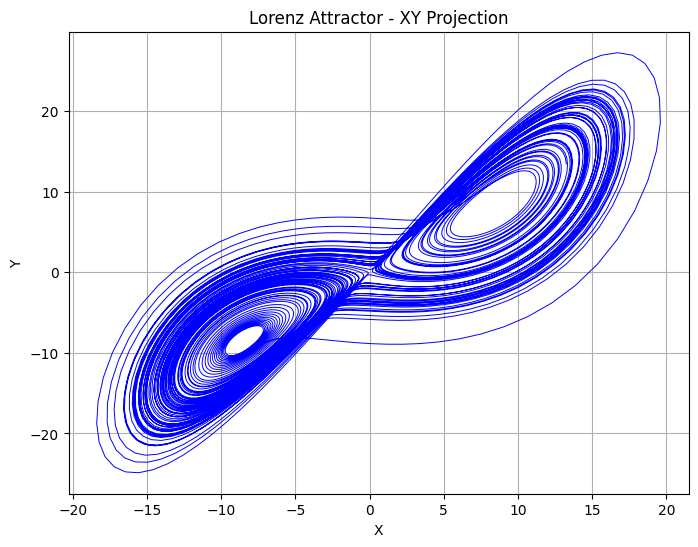

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lorenz system class
class LorenzAttractor:
    def __init__(self, a=10, b=28, c=2.667, dt=0.01):
        self.a = a
        self.b = b
        self.c = c
        self.dt = dt

    def derivatives(self, x, y, z):
        dx_dt = self.a * (y - x)
        dy_dt = self.b * x - y - x * z
        dz_dt = x * y - self.c * z
        return dx_dt, dy_dt, dz_dt

    def step(self, x, y, z):
        k1 = self.derivatives(x, y, z)
        k2 = self.derivatives(x + 0.5*self.dt*k1[0],
                              y + 0.5*self.dt*k1[1],
                              z + 0.5*self.dt*k1[2])
        k3 = self.derivatives(x + 0.5*self.dt*k2[0],
                              y + 0.5*self.dt*k2[1],
                              z + 0.5*self.dt*k2[2])
        k4 = self.derivatives(x + self.dt*k3[0],
                              y + self.dt*k3[1],
                              z + self.dt*k3[2])
        x_new = x + (self.dt/6)*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        y_new = y + (self.dt/6)*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
        z_new = z + (self.dt/6)*(k1[2] + 2*k2[2] + 2*k3[2] + k4[2])
        return x_new, y_new, z_new

    def simulate(self, x0=0, y0=1, z0=1.05, steps=10000):
        x, y, z = np.zeros(steps), np.zeros(steps), np.zeros(steps)
        x[0], y[0], z[0] = x0, y0, z0
        for i in range(1, steps):
            x[i], y[i], z[i] = self.step(x[i-1], y[i-1], z[i-1])
        return x, y, z

# Simulate system
lorenz = LorenzAttractor()
x, y, z = lorenz.simulate()

# XY Projection plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color="blue", linewidth=0.7)
plt.title("Lorenz Attractor - XY Projection")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# XZ Projection

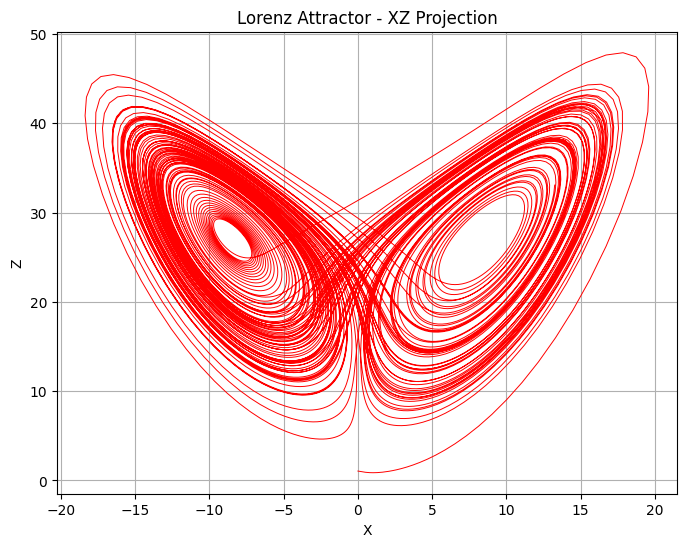

In [3]:
# XZ Projection plot
plt.figure(figsize=(8, 6))
plt.plot(x, z, color="red", linewidth=0.7)
plt.title("Lorenz Attractor - XZ Projection")
plt.xlabel("X")
plt.ylabel("Z")
plt.grid(True)
plt.show()


# YZ Projection

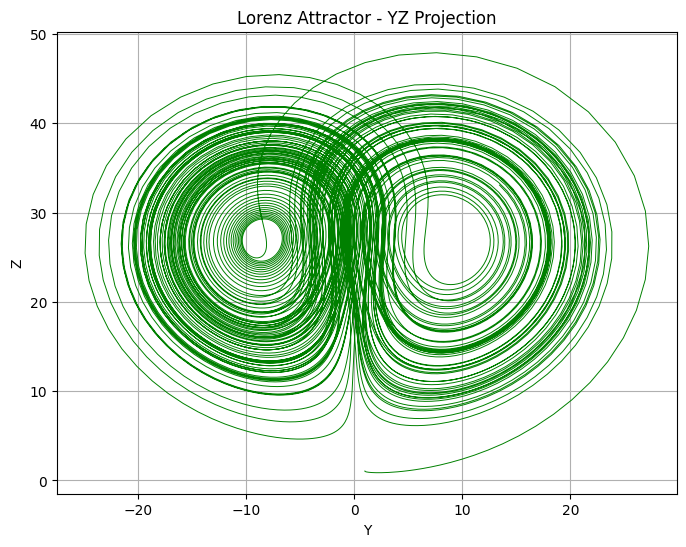

In [4]:
# YZ Projection plot
plt.figure(figsize=(8, 6))
plt.plot(y, z, color="green", linewidth=0.7)
plt.title("Lorenz Attractor - YZ Projection")
plt.xlabel("Y")
plt.ylabel("Z")
plt.grid(True)
plt.show()
